In [1]:
import keras
from keras.models import load_model
import foolbox
import foolbox
from foolbox.models import KerasModel
from foolbox.attacks import LBFGSAttack
from foolbox.attacks import ProjectedGradientDescentAttack
from foolbox.criteria import TargetClassProbability
import numpy as np
import matplotlib
import matplotlib.image as mpimg
import imageio
from foolbox.distances import Linfinity
from foolbox.adversarial import Adversarial
from keras.preprocessing import image
import os
from scipy.misc import imread,imresize
import matplotlib.pyplot as plt 

img = mpimg.imread("SAMPLE/2014-04-01 13.43.08.jpg")
network = load_model("classifier(final).h5")
fmodel = KerasModel(network, bounds = (0, 255), preprocessing = (0, 1))
criterion3 = TargetClassProbability(12, 0.95)
adversarial = Adversarial(fmodel, criterion = criterion3, original_image = img, original_class = 0, distance = Linfinity)


Using TensorFlow backend.


In [13]:
attack = ProjectedGradientDescentAttack()
adversarial_image = attack(adversarial, epsilon = 0.0003, random_start = True, iterations = 200, stepsize = 0.0001, return_early = False)
#adversarial_image = attack(adversarial, epsilon = 1e-18, maxiter=400)

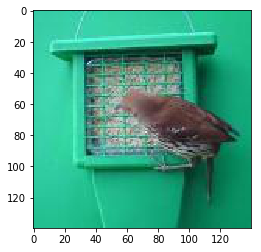

In [2]:
original = img/255.
plt.imshow(original)

In [11]:
x = image.load_img("SAMPLE/2014-04-01 13.43.08.jpg", target_size=(140,140))
x = image.img_to_array(x)
x = x.reshape((1,) + x.shape)
x = x/255.

from keras import optimizers
optim = optimizers.rmsprop(lr = 0.0001, decay = 1e-6)

network.compile(loss = 'categorical_crossentropy', 
                optimizer = optim,
                metrics = ['accuracy'])
pred = network.predict(x)


[[9.9997544e-01 0.0000000e+00 2.2626205e-06 4.9500258e-25 0.0000000e+00
  6.8996074e-28 3.0192267e-32 2.2267866e-05 1.4566321e-16 3.3313448e-28
  0.0000000e+00 3.3144677e-24 4.0750691e-20]]


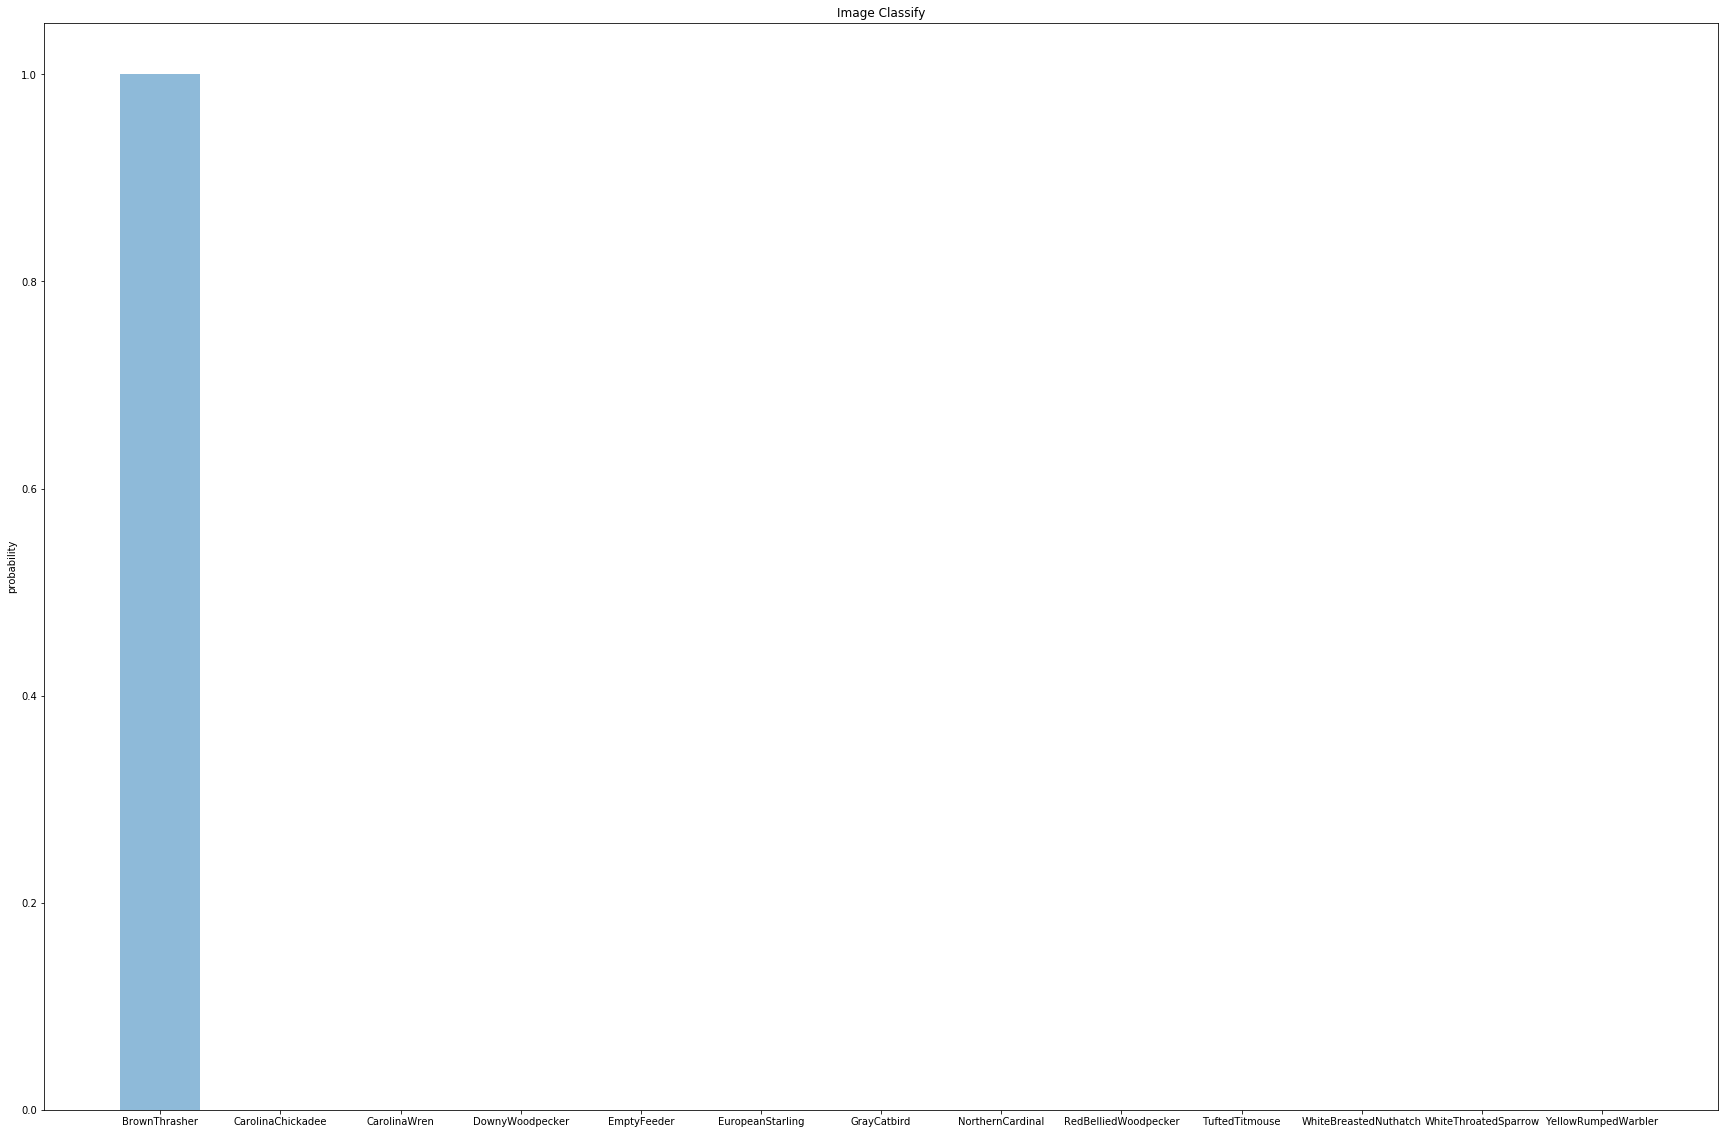

In [12]:
print(pred)
categories = os.listdir("data/train")
while len(categories) != 13:
  del categories[0]


plt.figure(figsize=(30, 20)) 
y_pos = np.arange(len(categories))
performance = pred[0]
 
plt.bar(y_pos, performance, 1/1.5 ,align='center', alpha=0.5)
plt.xticks(y_pos, categories)
plt.ylabel('probability')
plt.title('Image Classify')

plt.show()
pred[0].tofile('SAMPLE/original_predictions.csv' , sep='\n',format='%10.5f')

[[[102.         211.         206.        ]
  [103.64321455 212.64321455 204.        ]
  [103.         212.64321455 204.        ]
  ...
  [ 74.64321455 191.         160.        ]
  [ 74.         189.         162.64321455]
  [ 73.         191.64321455 163.        ]]

 [[103.64321455 211.         204.        ]
  [101.         210.         206.64321455]
  [103.64321455 211.         206.64321455]
  ...
  [ 74.         190.         161.        ]
  [ 72.         191.64321455 160.        ]
  [ 72.         191.64321455 163.        ]]

 [[102.         210.         204.        ]
  [102.         210.         204.        ]
  [102.         210.         206.64321455]
  ...
  [ 74.64321455 189.         161.        ]
  [ 73.         189.         160.        ]
  [ 74.64321455 190.         164.64321455]]

 ...

 [[ 53.         185.         155.64321455]
  [ 52.         185.64321455 152.        ]
  [ 52.         185.64321455 153.76214302]
  ...
  [ 24.         140.         103.        ]
  [ 24.         13

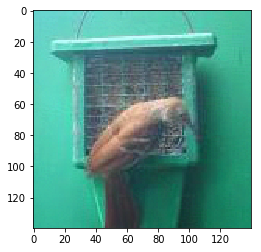

In [17]:
print(adversarial_image)
printable = adversarial_image/255.
plt.imshow(printable)

In [18]:
y = adversarial_image.reshape((1,) + adversarial_image.shape)
#y = y/255.


pred = network.predict(y)

In [19]:
print(pred)

[[0.0000000e+00 0.0000000e+00 1.6847988e-12 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.5784552e-17
  0.0000000e+00 0.0000000e+00 1.0000000e+00]]


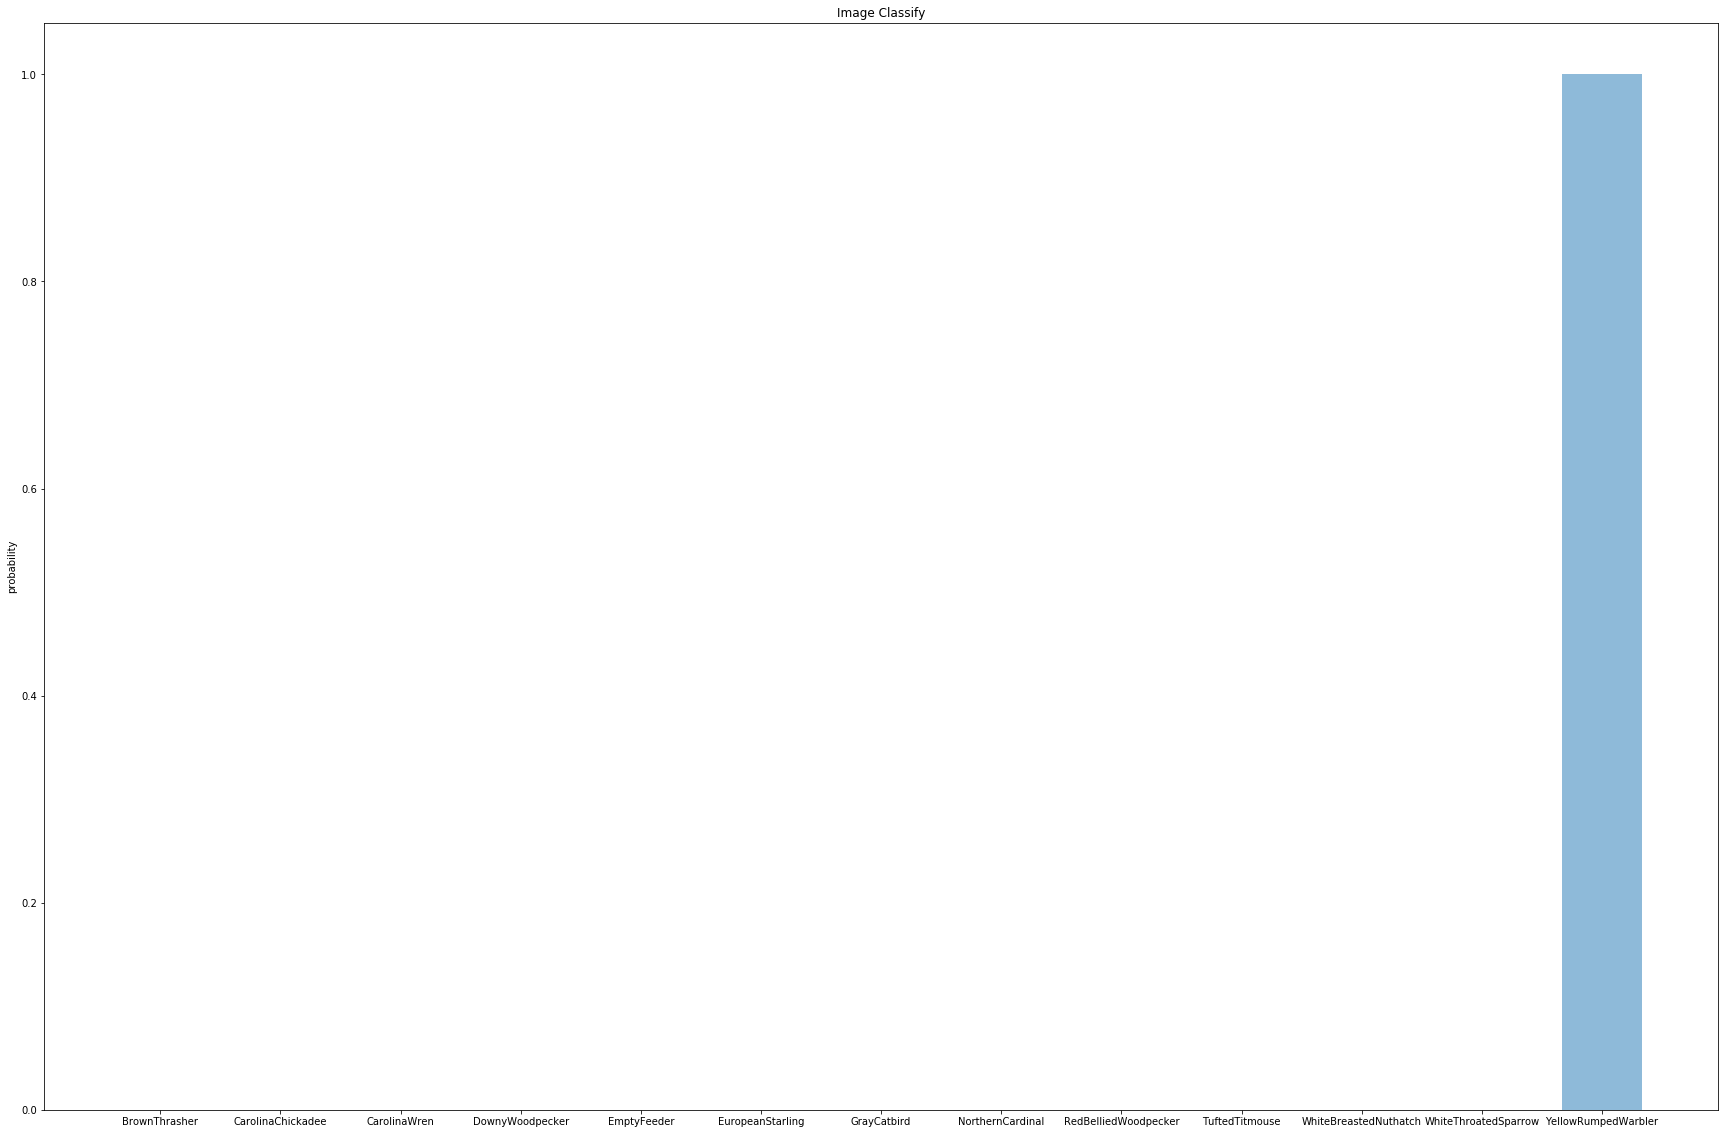

In [20]:
y_pos = np.arange(len(categories))
performance = pred[0]
plt.figure(figsize=(30, 20)) 
plt.bar(y_pos, performance, 1/1.5 ,align='center', alpha=0.5)
plt.xticks(y_pos, categories)
plt.ylabel('probability')
plt.title('Image Classify')

plt.show()

In [21]:
adverse = np.round(adversarial_image)
matplotlib.image.imsave('adv/attacker1.jpg', adverse/255, format = 'png')

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


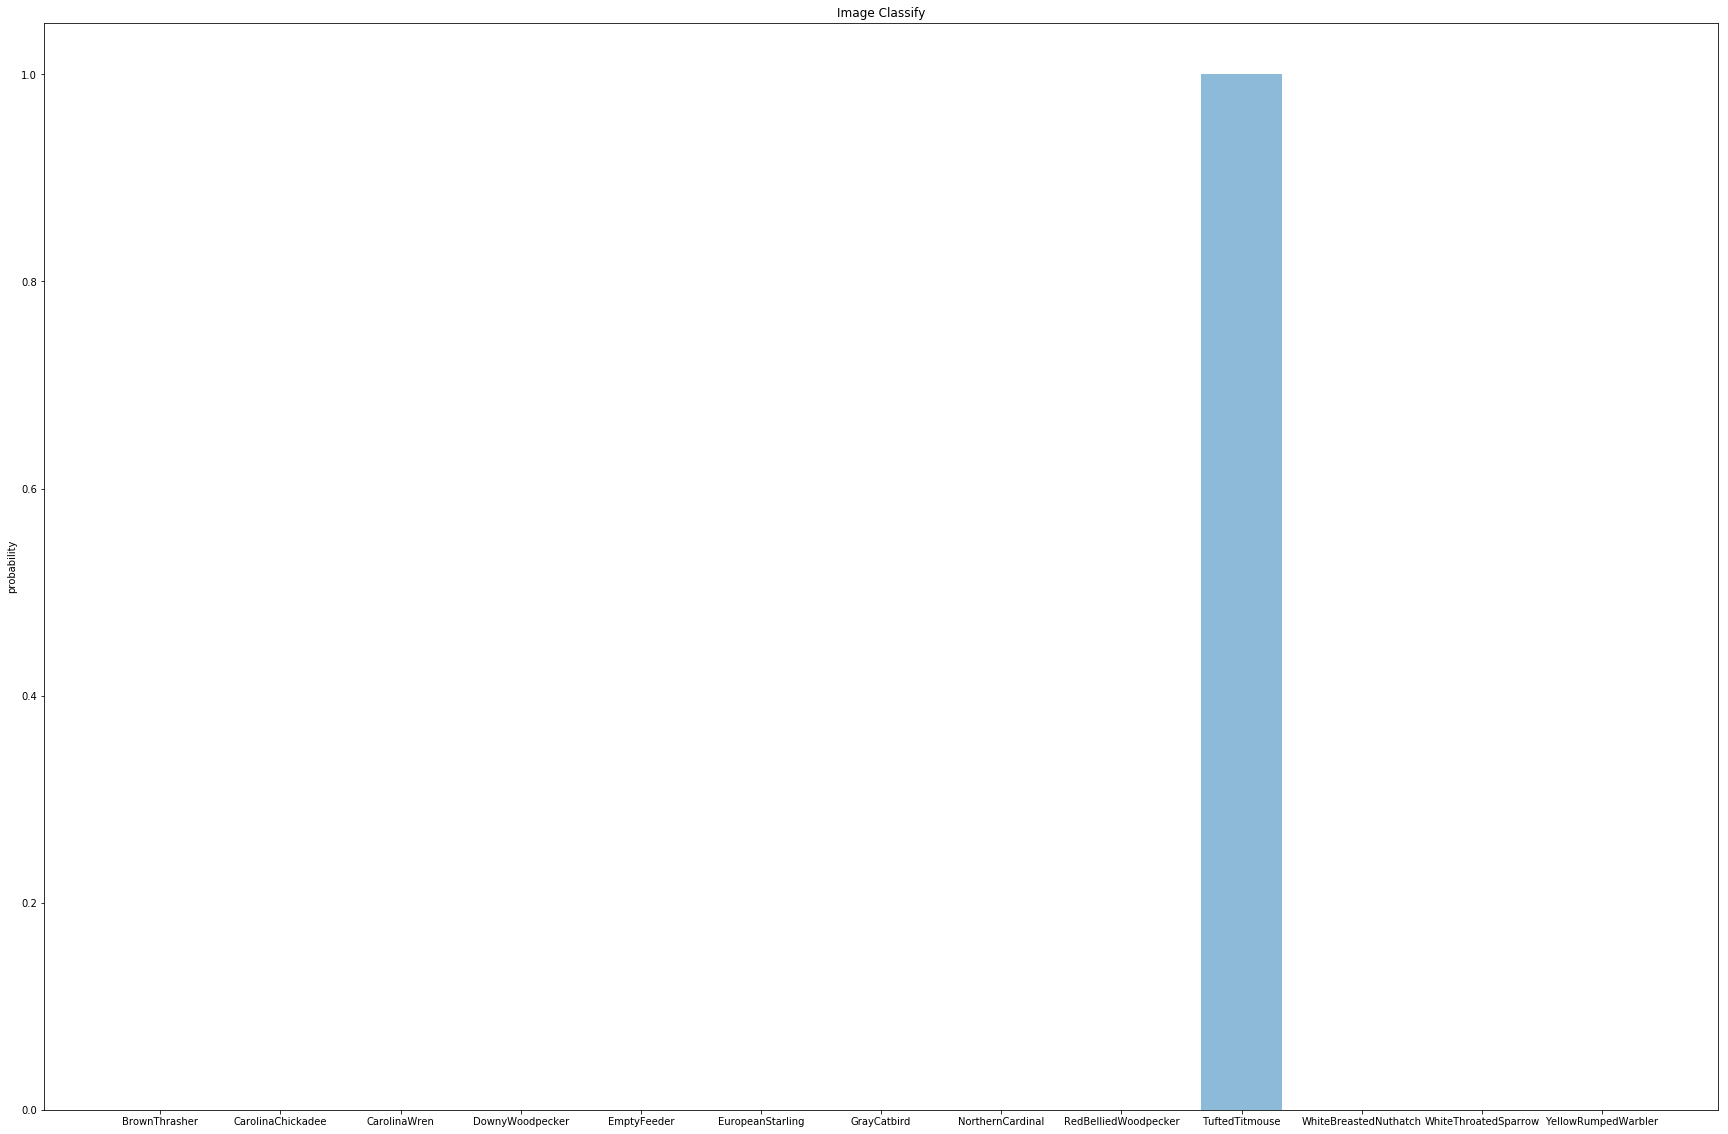

AttributeError: 'list' object has no attribute 'tofile'

In [10]:
import PIL.Image
x = PIL.Image.open('SAMPLE/2014-04-01 13.43.08_TuftedTitmouse.png')
x = np.array(x)
x =  x[...,:3]
x = x.reshape((1,) + x.shape)


#x = x/255.

from keras import optimizers
optim = optimizers.rmsprop(lr = 0.0001, decay = 1e-6)

network.compile(loss = 'categorical_crossentropy', 
                optimizer = optim,
                metrics = ['accuracy'])
pred = network.predict(x)
print(pred)
categories = os.listdir("data/train")
while len(categories) != 13:
  del categories[0]


plt.figure(figsize=(30, 20)) 
y_pos = np.arange(len(categories))
performance = pred[0]
 
plt.bar(y_pos, performance, 1/1.5 ,align='center', alpha=0.5)
plt.xticks(y_pos, categories)
plt.ylabel('probability')
plt.title('Image Classify')

plt.show()
pred[0].tofile('SAMPLE/Adv_predictions.csv' , sep='\n',format='%10.5f')
categories.tofile('SAMPLE/classes.csv' , sep='\n',format='%10.5f')

In [56]:
import cv2
x = cv2.imread("adv/attacker12.png")
print(x)
x = x.reshape((1,) + x.shape)
q = network.predict(x)
print(q)

[[[154 213  66]
  [154 213  66]
  [168 213  64]
  ...
  [133 204  42]
  [145 192  34]
  [134 202  47]]

 [[156 209  66]
  [168 211  66]
  [155 204  57]
  ...
  [145 204  49]
  [145 203  48]
  [129 202  45]]

 [[168 213  66]
  [156 200  63]
  [169 200  63]
  ...
  [134 204  49]
  [131 203  42]
  [144 202  33]]

 ...

 [[149 205  31]
  [148 197  30]
  [147 198  44]
  ...
  [108 160  22]
  [108 160   8]
  [ 97 156  22]]

 [[138 205  46]
  [148 204  44]
  [145 203  29]
  ...
  [101 154  10]
  [108 151  11]
  [108 160  22]]

 [[136 193  46]
  [140 195  44]
  [147 200  29]
  ...
  [108 160  22]
  [108 160  20]
  [108 150  22]]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [50]:
print(adversarial_image)

[[[ 65.95156929 212.95156929 154.        ]
  [ 65.95156929 212.95156929 154.        ]
  [ 64.         212.95156929 167.95156929]
  ...
  [ 42.         203.95156929 133.        ]
  [ 34.         192.         144.95156929]
  [ 46.95156929 201.95156929 134.        ]]

 [[ 65.95156929 209.         156.        ]
  [ 65.95156929 211.         167.95156929]
  [ 57.         204.         155.        ]
  ...
  [ 48.95156929 203.95156929 145.        ]
  [ 47.95156929 202.95156929 144.95156929]
  [ 45.         201.95156929 129.        ]]

 [[ 65.95156929 212.95156929 167.95156929]
  [ 63.         200.         156.        ]
  [ 63.         200.         168.95156929]
  ...
  [ 48.95156929 203.95156929 134.        ]
  [ 42.         202.95156929 131.        ]
  [ 33.         201.95156929 143.95156929]]

 ...

 [[ 31.         204.95156929 148.95156929]
  [ 30.         197.         147.95156929]
  [ 43.95156929 198.         146.95156929]
  ...
  [ 21.95156929 159.95156929 107.95156929]
  [  8.         15

In [52]:
av = np.round(adversarial_image)
print(av)


[[[ 66. 213. 154.]
  [ 66. 213. 154.]
  [ 64. 213. 168.]
  ...
  [ 42. 204. 133.]
  [ 34. 192. 145.]
  [ 47. 202. 134.]]

 [[ 66. 209. 156.]
  [ 66. 211. 168.]
  [ 57. 204. 155.]
  ...
  [ 49. 204. 145.]
  [ 48. 203. 145.]
  [ 45. 202. 129.]]

 [[ 66. 213. 168.]
  [ 63. 200. 156.]
  [ 63. 200. 169.]
  ...
  [ 49. 204. 134.]
  [ 42. 203. 131.]
  [ 33. 202. 144.]]

 ...

 [[ 31. 205. 149.]
  [ 30. 197. 148.]
  [ 44. 198. 147.]
  ...
  [ 22. 160. 108.]
  [  8. 160. 108.]
  [ 22. 156.  97.]]

 [[ 46. 205. 138.]
  [ 44. 204. 148.]
  [ 29. 203. 145.]
  ...
  [ 10. 154. 101.]
  [ 11. 151. 108.]
  [ 22. 160. 108.]]

 [[ 46. 193. 136.]
  [ 44. 195. 140.]
  [ 29. 200. 147.]
  ...
  [ 22. 160. 108.]
  [ 20. 160. 108.]
  [ 22. 150. 108.]]]


In [88]:
matplotlib.image.imsave('adv/attacker12.jpg', av/255, format = 'png')

In [2]:
import PIL.Image
image = PIL.Image.open('adversarial_examples/BrownThrasher/2015-07-23 18.27.03-1_EmptyFeeder.png')
image = np.array(image)
image =  image[...,:3]
image = image.reshape((1,) + image.shape)
iq = network.predict(image)
print(iq)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 4.9802556e-13 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]]
